# Loan Prediction Project By Analytic Vidya

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv(r'C:\Users\Shubhamay\Downloads\train_loan_prection.csv')
test=pd.read_csv(r'C:\Users\Shubhamay\Downloads\test_loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
#to see shape of our dataset
df.shape

(614, 13)

In [3]:
#to see about our dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


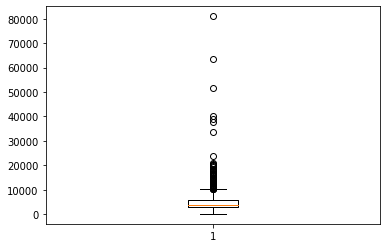

In [4]:
#from the diagram we can see the outlier in ApplicantIncome
plt.boxplot(df['ApplicantIncome'])
plt.show()

In [5]:
#actually total_income is the sum of ApplicantIncome and CoapplicantIncome
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(['ApplicantIncome','CoapplicantIncome'],1,inplace=True)


In [6]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


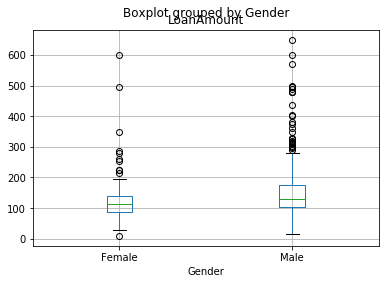

In [7]:
#from the diagram we can see the outlier
df.boxplot('LoanAmount',by='Gender')
plt.show()

In [8]:
#to nullify the effect of the outlier we apply log to LoanAmount
df['LoanAmount_log']=np.log(df['LoanAmount'])

In [9]:
df.drop(['LoanAmount'],axis=1,inplace=True)

In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,6091.0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,3000.0,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4941.0,4.787492
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,360.0,1.0,Rural,Y,2900.0,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y,4106.0,3.688879
611,LP002983,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y,8312.0,5.533389
612,LP002984,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y,7583.0,5.231109


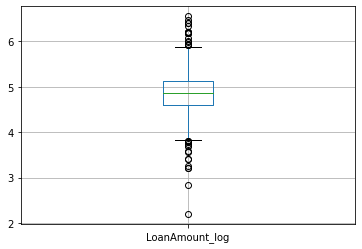

In [11]:
#Box Plot of LoanAmount_Log
df.boxplot('LoanAmount_log')

In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
#columns of df dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income', 'LoanAmount_log'],
      dtype='object')

In [16]:
cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area']

In [17]:
# null value treatment of categarical variable
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0],inplace=True)
#null value treatment of continious variable
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Total_Income'].fillna(df['Total_Income'].mean(),inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)


In [18]:
#to check if there is any null value
df.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
LoanAmount_log      0
dtype: int64

In [20]:
#level encode of categorical variabl
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for var in cat:
    le=preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))

In [21]:
df.dtypes

Loan_ID              object
Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
Loan_Amount_Term    float64
Credit_History        int32
Property_Area         int32
Loan_Status          object
Total_Income        float64
LoanAmount_log      float64
dtype: object

In [69]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,LP001002,1,0,0,0,0,360.0,1,2,Y,5849.0,4.857444
1,LP001003,1,1,1,0,0,360.0,1,0,N,6091.0,4.852030
2,LP001005,1,1,0,0,1,360.0,1,2,Y,3000.0,4.189655
3,LP001006,1,1,0,1,0,360.0,1,2,Y,4941.0,4.787492
4,LP001008,1,0,0,0,0,360.0,1,2,Y,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,360.0,1,0,Y,2900.0,4.262680
610,LP002979,1,1,3,0,0,180.0,1,0,Y,4106.0,3.688879
611,LP002983,1,1,1,0,0,360.0,1,2,Y,8312.0,5.533389
612,LP002984,1,1,2,0,0,360.0,1,2,Y,7583.0,5.231109


In [70]:
number=LabelEncoder()
df['Loan_Status']=number.fit_transform(df['Loan_Status'])

In [71]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,LP001002,1,0,0,0,0,360.0,1,2,1,5849.0,4.857444
1,LP001003,1,1,1,0,0,360.0,1,0,0,6091.0,4.852030
2,LP001005,1,1,0,0,1,360.0,1,2,1,3000.0,4.189655
3,LP001006,1,1,0,1,0,360.0,1,2,1,4941.0,4.787492
4,LP001008,1,0,0,0,0,360.0,1,2,1,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,360.0,1,0,1,2900.0,4.262680
610,LP002979,1,1,3,0,0,180.0,1,0,1,4106.0,3.688879
611,LP002983,1,1,1,0,0,360.0,1,2,1,8312.0,5.533389
612,LP002984,1,1,2,0,0,360.0,1,2,1,7583.0,5.231109


{'whiskers': [<matplotlib.lines.Line2D at 0xdea8191a08>,
 'caps': [<matplotlib.lines.Line2D at 0xde9df1bb48>,
 'boxes': [<matplotlib.lines.Line2D at 0xde9df1b4c8>],
 'medians': [<matplotlib.lines.Line2D at 0xdea56592c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xdea1cbbac8>],
 'means': []}

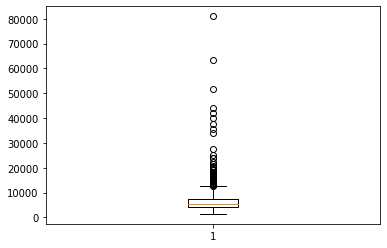

In [72]:
#total income before dealing with out lier
plt.boxplot(df['Total_Income'])

In [73]:
#deal with outlier in total income we apply log in it
df['Total_Income']=np.log(df['Total_Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0xdea7f77bc8>,
 'caps': [<matplotlib.lines.Line2D at 0xdea7f77c88>,
 'boxes': [<matplotlib.lines.Line2D at 0xdea7f77888>],
 'medians': [<matplotlib.lines.Line2D at 0xdea7fa9248>],
 'fliers': [<matplotlib.lines.Line2D at 0xdea7fa9208>],
 'means': []}

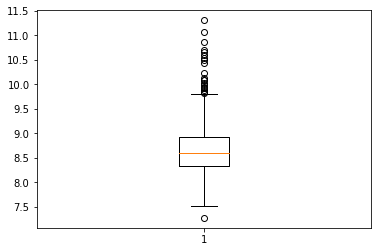

In [74]:
#to see the total income colomn in box plot
plt.boxplot(df['Total_Income'])

In [75]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_log
0,LP001002,1,0,0,0,0,360.0,1,2,1,8.674026,4.857444
1,LP001003,1,1,1,0,0,360.0,1,0,0,8.714568,4.852030
2,LP001005,1,1,0,0,1,360.0,1,2,1,8.006368,4.189655
3,LP001006,1,1,0,1,0,360.0,1,2,1,8.505323,4.787492
4,LP001008,1,0,0,0,0,360.0,1,2,1,8.699515,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,360.0,1,0,1,7.972466,4.262680
610,LP002979,1,1,3,0,0,180.0,1,0,1,8.320205,3.688879
611,LP002983,1,1,1,0,0,360.0,1,2,1,9.025456,5.533389
612,LP002984,1,1,2,0,0,360.0,1,2,1,8.933664,5.231109


In [76]:
#preproprocessing data in test_dataset
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test.drop(['ApplicantIncome','CoapplicantIncome'],1,inplace=True)
test['LoanAmount_log']=np.log(test['LoanAmount'])
test.drop(['LoanAmount'],axis=1,inplace=True)
cat=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Credit_History', 'Property_Area']
# null value treatment of categarical variable
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Education'].fillna(test['Education'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Property_Area'].fillna(test['Property_Area'].mode()[0],inplace=True)
#null value treatment of continious variable
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Total_Income'].fillna(test['Total_Income'].mean(),inplace=True)
test['LoanAmount_log'].fillna(test['LoanAmount_log'].mean(),inplace=True)
#level encode of categorical variabl
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for var in cat:
    le=preprocessing.LabelEncoder()
    test[var]=le.fit_transform(test[var].astype('str'))
test['Total_Income']=np.log(test['Total_Income'])

In [77]:
#test data after preprocessing
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanAmount_log
0,LP001015,1,1,0,0,0,360.0,1,2,8.651724,4.700480
1,LP001022,1,1,1,0,0,360.0,1,2,8.428581,4.836282
2,LP001031,1,1,2,0,0,360.0,1,2,8.824678,5.337538
3,LP001035,1,1,2,0,0,360.0,1,2,8.494129,4.605170
4,LP001051,1,0,0,1,0,360.0,1,2,8.094378,4.356709
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,360.0,1,2,8.663196,4.727388
363,LP002975,1,1,0,0,0,360.0,1,2,8.490233,4.744932
364,LP002980,1,0,0,0,0,360.0,1,1,8.564649,4.836282
365,LP002986,1,1,0,0,0,360.0,1,0,8.908289,5.062595


In [78]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income', 'LoanAmount_log'],
      dtype='object')

In [79]:
# difine X_train,y_train based on dependent and independent variable
from sklearn.linear_model import LogisticRegression
logistic_regressor=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'Total_Income', 'LoanAmount_log']
X_train=df[list(logistic_regressor)].values
y_train=df['Loan_Status'].values
X_test=test[list(logistic_regressor)].values

In [80]:
X_train

array([[1.        , 0.        , 0.        , ..., 2.        , 8.67402599,
        4.85744418],
       [1.        , 1.        , 1.        , ..., 0.        , 8.71456755,
        4.85203026],
       [1.        , 1.        , 0.        , ..., 2.        , 8.00636757,
        4.18965474],
       ...,
       [1.        , 1.        , 1.        , ..., 2.        , 9.02545553,
        5.53338949],
       [1.        , 1.        , 2.        , ..., 2.        , 8.93366418,
        5.23110862],
       [0.        , 0.        , 0.        , ..., 1.        , 8.43010908,
        4.89034913]])

In [81]:
#apply logistic regression
lreg=LogisticRegression(solver='liblinear')
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
#to cheak score of our model
lreg.score(X_train,y_train)

0.8094462540716613

In [85]:
#made prediction
prediction=lreg.predict(X_test)

In [86]:
predictions=lreg.predict(X_train)

In [87]:
from sklearn import metrics
accuracy=metrics.accuracy_score(predictions,y_train)

In [101]:
# to find accuracy of our model
accuracy_in_percentage=accuracy*100
print('Accuracy:{:.2f}'.format(accuracy_in_percentage))

Accuracy:80.94


In [89]:
#convert prediction to yes and no
prediction=number.inverse_transform(prediction)

In [90]:
test['Loan_Status']=prediction
test.to_csv('Logistic_Regressiont_Loan_status_Analytics.csv',columns=['Loan_ID','Loan_Status'],index=False)
#location of this file is C:\Users\Shubhamay

# Created By:: SHUBHAMAY CHAND